<a href="https://colab.research.google.com/github/prax1807/Git-to-do/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download govindaramsriram/energy-consumption-dataset-linear-regression
!unzip energy-consumption-dataset-linear-regression.zip


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:

data = pd.read_csv("train_energy_data.csv")
data

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [ ]:
data.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [ ]:
data.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


In [ ]:
data["Building Type Cat"]=pd.Categorical(data['Building Type']).codes
data["Day of Week Cat"]=pd.Categorical(data['Day of Week']).codes
Build_code= data[["Building Type Cat","Building Type"]]
Day_code = data[["Day of Week Cat","Day of Week"]]
data.drop(["Building Type","Day of Week"],axis=1,inplace=True)


In [ ]:
Build_code

,Building Type Cat,Building Type
0,2,Residential
1,0,Commercial
2,1,Industrial
3,2,Residential
4,0,Commercial
...,...,...
995,2,Residential
996,1,Industrial
997,0,Commercial
998,2,Residential


In [ ]:
Day_code

,Day of Week Cat,Day of Week
0,0,Weekday
1,0,Weekday
2,1,Weekend
3,0,Weekday
4,0,Weekday
...,...,...
995,1,Weekend
996,1,Weekend
997,0,Weekday
998,1,Weekend


In [ ]:
data.corr("spearman")

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type Cat,Day of Week Cat
Square Footage,1.000000,0.034764,-0.014804,0.027982,0.781608,0.041251,0.012063
Number of Occupants,0.034764,1.000000,0.024896,0.015016,0.342764,-0.004039,0.015213
Appliances Used,-0.014804,0.024896,1.000000,-0.063900,0.297741,-0.024145,-0.008053
Average Temperature,0.027982,0.015016,-0.063900,1.000000,-0.022312,0.037932,-0.010411
Energy Consumption,0.781608,0.342764,0.297741,-0.022312,1.000000,-0.194977,-0.011817
Building Type Cat,0.041251,-0.004039,-0.024145,0.037932,-0.194977,1.000000,-0.025302
Day of Week Cat,0.012063,0.015213,-0.008053,-0.010411,-0.011817,-0.025302,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

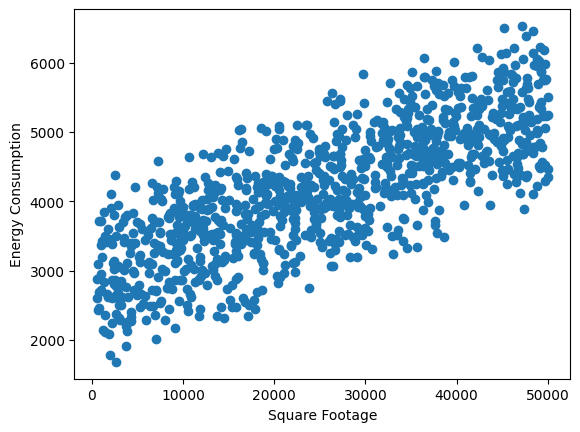

In [ ]:
X=data[["Square Footage"]]
Y=data["Energy Consumption"]
plt.scatter(X,Y)
plt.xlabel("Square Footage")
plt.ylabel("Energy Consumption")
plt.show

In [ ]:
X_train=X
Y_train=Y

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
test_data = pd.read_csv("test_energy_data.csv")
X_test=test_data[["Square Footage"]]
Y_test=test_data["Energy Consumption"]

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 334658.43
R-squared (R2): 0.51


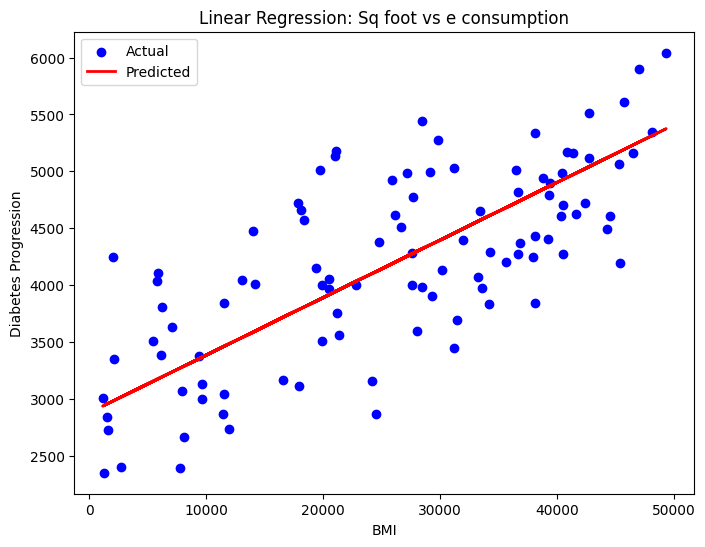

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Linear Regression: Sq foot vs e consumption')
plt.legend()
plt.show()